# Day 1

## Part 1

In [3]:
import pandas as pd
f = open("../../../input.txt", "r")
c = f.readlines()


In [2]:
data = [int(x.replace('\n','')) for x in c]
df = pd.Series(data)


In [4]:
## add manually last 2 records since the rolling works on left side
tmp = df.rolling(window=3,center=False, min_periods=3).sum().dropna()
(tmp.append(pd.Series([17125,8562 ]), ignore_index=False).diff()>0).sum()

1653

# Day2

## Part 1

In [18]:
f = open("./input2.txt", "r")
c = f.readlines()

In [21]:
df = pd.DataFrame(c)[0].str.replace('\n','').str.split(' ').apply(pd.Series)


In [22]:
df.loc[df[0]=='forward','forward'] = df[1]
df.loc[df[0]!='forward','depth'] = df[1]


In [23]:
df['sign'] = 1
df.loc[df[0]=='up', 'sign'] = -1


In [24]:
df['forward'].fillna(0, inplace=True)
df['depth_copy'] = df['depth'].copy()
df['depth'].fillna(0, inplace=True)
df['depth_copy'].ffill(inplace=True)


In [27]:
df['depth'] = df['depth'].astype(int)
df['forward'] = df['forward'].astype(int)
df['dpth_sign'] = df['depth'].multiply(df['sign'])


In [28]:
df[['forward','dpth_sign']].sum()

forward      2065
dpth_sign     917
dtype: int64

In [176]:
2065*917

1893605

## Part 2

In [29]:
df['aim'] = df['dpth_sign']

In [30]:
df['aim_cumsum'] = df['aim'].cumsum()

In [31]:
depth = 0
aim = 0
forward = 0

for _, row in df.iterrows():
    value = int(row[1])
    if row[0]=='up':
        # depth  = depth - value
        aim = aim - value
    elif row[0]== 'down':
        # depth  = depth + value
        aim = aim + value
    else:
        forward = forward + value
        depth = depth + (aim * value)
        
        
print(depth, aim, forward)
    
    
    

1026990 917 2065


In [210]:
1026990  * 2065

2120734350

# Day3

## Part 1

In [230]:
df = pd.read_csv('./input3.csv', header=None,dtype=object)

In [32]:
df = pd.read_csv('./input3.csv', header=None,dtype=object)
df_split = df[0].apply(lambda x: list(x)).apply(pd.Series)

In [37]:
bin1 = ''.join(df_split.mode(axis=0).values[0])

In [38]:
int(bin1, 2)

190

In [240]:
# manually reverse bits
int("111101000001",2)

3905

## Part 2

In [54]:
df = pd.read_csv('./input3.csv', header=None,dtype=object)
df_split = df[0].apply(lambda x: list(x)).apply(pd.Series)


col = 0
def find_oxy(df, col):
    if df.shape[0]==1:
        print(df.index, 'single oxy')
        return df
    else:
        # print ('working on column', col)
        most_common = df[col].mode().max()
        col = col+1
        # print (df.columns)
        print (df[df[col]==most_common].shape)
        find_oxy(df[df[col]==most_common][df.columns[1::]], col)
    return df


def find_co2(df, col):
    if df.shape[0]==1:
        print(df.index, 'single co2')
        return df
    else:
        # print ('working on column', col)
        most_common = df[col].mode().max()
        least_common = "1" if most_common=="0" else "1"
        col = col+1
        # print (df.columns)
        print (df[df[col]==least_common].shape)
        find_oxy(df[df[col]==least_common][df.columns[1::]], col)
    return df

        
a = find_oxy(df_split, col=0)
a = find_co2(df_split, col=0)

(511, 12)
(256, 11)
(126, 10)
(72, 9)
(37, 8)
(15, 7)
(8, 6)
(4, 5)
(2, 4)
(1, 3)
Int64Index([272], dtype='int64') single oxy
(489, 12)
(243, 11)
(109, 10)
(62, 9)
(28, 8)
(17, 7)
(7, 6)
(2, 5)
(1, 4)
Int64Index([522], dtype='int64') single oxy


In [291]:
178
255

False

In [40]:
a = ''.join(df_split.loc[178].values) # oxy
b = ''.join(df_split.loc[255].values) # CO2

In [41]:
int(a,2)

282

In [42]:
int(b,2)

3205

In [43]:
int(a,2) * int(b,2)

903810

## Day 4

In [9]:
order = [62,55,98,93,48,28,82,78,19,96,31,42,76,25,34,4,18,80,66,6,14,17,57,54,90,27,40,47,9,36,97,56,87,61,91,1,64,71,99,38,70,5,94,85,49,59,69,26,21,60,0,79,2,95,11,84,20,24,8,51,46,44,88,22,16,53,7,32,89,67,15,86,41,92,10,77,68,63,43,75,33,30,81,37,83,3,39,65,12,45,23,73,72,29,52,58,35,50,13,74]
len(order)

100

In [10]:
f = open("../../../input4.txt", "r")
c = f.readlines()

In [11]:
df = pd.DataFrame(pd.DataFrame(c)[0].str.replace('\n',''))
df = df[df[0].str.len()==14]
df = df[0].str.split(' ').apply(lambda x: [y for y in x if y!='']).apply(pd.Series)
df = df.astype(int)


In [12]:
arr3d = df.copy().to_numpy().reshape(100,5,5)

In [13]:
import numpy as np
history = []
dict = ()
for i in order:
    # print(i)
    history.append(i)
    hor = np.isin(arr3d, history).sum(axis=1)
    ver = np.isin(arr3d, history).sum(axis=2)
    if len(np.where(hor == 5)[0]) > 0:
        print('winner hor')
        print (np.where(hor == 5))
        print('winning num', i)
        arr3d[np.where(hor == 5)[0]] = -1 # mark minus so the board doesnt play anymore
        win_num = i
        win_board = np.where(hor == 5)

    if len(np.where(ver == 5)[0]) > 0:
        print('winner vert')
        print( np.where(ver == 5))
        print('winning num', i)
        arr3d[np.where(ver == 5)[0]] = -1 # mark minus so the board doesnt play anymore
        win_num = i
        win_board = np.where(hor == 5)

winner vert
(array([20], dtype=int64), array([0], dtype=int64))
winning num 14
winner vert
(array([41], dtype=int64), array([0], dtype=int64))
winning num 90
winner hor
(array([86], dtype=int64), array([4], dtype=int64))
winning num 40
winner hor
(array([72], dtype=int64), array([1], dtype=int64))
winning num 47
winner hor
(array([35], dtype=int64), array([4], dtype=int64))
winning num 87
winner hor
(array([74], dtype=int64), array([1], dtype=int64))
winning num 61
winner vert
(array([56], dtype=int64), array([3], dtype=int64))
winning num 61
winner hor
(array([73], dtype=int64), array([0], dtype=int64))
winning num 1
winner hor
(array([8], dtype=int64), array([4], dtype=int64))
winning num 99
winner vert
(array([55, 59], dtype=int64), array([0, 1], dtype=int64))
winning num 99
winner hor
(array([54], dtype=int64), array([0], dtype=int64))
winning num 70
winner hor
(array([14], dtype=int64), array([2], dtype=int64))
winning num 94
winner vert
(array([96], dtype=int64), array([0], dtype

In [14]:
print('last_board_to_win', win_num , win_board[0][0])
# init to remove all the (-1)
arr3d = df.to_numpy().reshape(100,5,5)
last_win = pd.DataFrame(arr3d[win_board[0][0]])
ind_of_winning_number = np.where(np.array(order) == win_num)[0][0]

last_board_to_win 81 47


In [110]:
last_win[~last_win.isin(history[0:ind_of_winning_number+1])].sum().sum()*win_num

18063.0

## Day 5

In [15]:

f = open("../../../input5.txt", "r")
c = f.readlines()

In [16]:
import pandas as pd

In [17]:
df = pd.DataFrame(c)
df = df[0].str.replace('\n','').str.replace('->',',').str.split(',').apply(pd.Series)
df = df.astype(int)
df['filter'] = df.apply(lambda row: 1 if ((row[0]==row[2])|(row[1]==row[3])) else 0, axis=1)   # keep only vertical and horizontal lines


In [66]:
df['filter'].value_counts()

1    337
0    163
Name: filter, dtype: int64

In [67]:
df_lines = df[df['filter']==1]

In [69]:
# check max size of board
df[[0,1,2,3]].max().max()

990

In [21]:
import numpy as np
zero = pd.DataFrame(0, index=np.arange(df[[0,1,2,3]].max().max()+1), columns=np.arange(df[[0,1,2,3]].max().max()+1))

In [22]:
# get all points on diagonal with start and end point
def get_line(x1, y1, x2, y2):
    points = []
    issteep = abs(y2-y1) > abs(x2-x1)
    if issteep:
        x1, y1 = y1, x1
        x2, y2 = y2, x2
    rev = False
    if x1 > x2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1
        rev = True
    deltax = x2 - x1
    deltay = abs(y2-y1)
    error = int(deltax / 2)
    y = y1
    ystep = None
    if y1 < y2:
        ystep = 1
    else:
        ystep = -1
    for x in range(x1, x2 + 1):
        if issteep:
            points.append((y, x))
        else:
            points.append((x, y))
        error -= deltay
        if error < 0:
            y += ystep
            error += deltax
    # Reverse the list if the coordinates were reversed
    if rev:
        points.reverse()
    return points

In [23]:
def add_counter(df_zero, x1, x2, x3, x4):
    if x1==x3:
        min_x = np.min([x2, x4])
        max_x = np.max([x2, x4])
        # print (min_x, max_x)
        df_zero.loc[x1][df_zero.columns[min_x:max_x+1]]  = df_zero.loc[x1][df_zero.columns[min_x:max_x+1]]+1
    elif x2 == x4:
        min_x = np.min([x1, x3])
        max_x = np.max([x1, x3])
        # print (min_x, max_x)
        df_zero.loc[min_x:max_x][x2]  = df_zero.loc[min_x:max_x][x2] + 1
    # with diagonal for part 2
    else:
        points = get_line(x1, x2, x3, x4)
        for point in points:
            x = point[0]
            y = point[1]
            df_zero.loc[x][y] = df_zero.loc[x][y] + 1
        
    return df_zero
    

In [24]:
for i, row in df.iterrows():
    zero = add_counter(zero, row[0], row[1], row[2], row[3])

C:\Users\MELMAT~1\AppData\Local\Temp/ipykernel_56560/2220614848.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zero.loc[min_x:max_x][x2]  = df_zero.loc[min_x:max_x][x2] + 1


In [26]:
len(np.where(zero.values>=2)[0])

17193

# Day 6

## Part 1

In [284]:
f = open("../../../input6.txt", "r")
c = f.readlines()

In [285]:
import pandas as pd
import numpy as np

df = pd.DataFrame(c)
df = df[0].str.split(',').apply(pd.Series).astype(int)
df  = df.T

In [185]:
res = dict()
for step in np.arange(80):
    
    zeros = (df[0] == 0).sum()
    # print ('new', zeros)
    df = df.replace(0,7)
    df = df.subtract(1)
    new = pd.DataFrame(8, index=np.arange(zeros), columns=[0])
    df = df.append(new)
    res[step] = df.shape[0]
    # print(df.shape)

In [186]:
df.shape

(363101, 1)

## Part 2

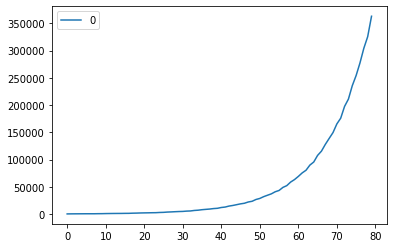

In [187]:
curve = pd.DataFrame.from_dict(res, orient='index')
ax = curve.plot()

In [308]:
import pandas as pd
import numpy as np

df = pd.DataFrame(c)
df = df[0].str.split(',').apply(pd.Series).astype(int)
df  = df.T

In [348]:
dicts = df[0].value_counts().to_dict()

In [380]:
fish = pd.DataFrame(0, index=[0,1,2,3,4,5,6,7,8], columns=[0])

In [381]:
for key in dicts.keys():
    fish.loc[key] = dicts[key]    


In [382]:
fish

,0
0,0
1,115
2,52
3,47
4,49
5,37
6,0
7,0
8,0


In [383]:
for i in np.arange(256):
    zeros = fish.loc[0][0]
    fish.loc[7,0] = zeros + fish.loc[7,0]
    fish = fish.shift(-1).fillna(0)
    fish.loc[8,0] = zeros + fish.loc[8,0]
    # print(fish)


In [386]:
int(fish.sum())

1644286074024

# Day 7

## Part 1

In [4]:
f = open("./data/input7.txt", "r")
c = f.readlines()
import pandas as pd

In [5]:
df = pd.DataFrame(c)

In [10]:
df = df[0].str.split(',').apply(pd.Series).astype(int).T

<AxesSubplot:xlabel='index', ylabel='0'>

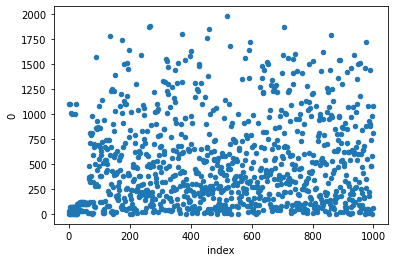

In [30]:
df['index'] = df.index
df.plot.scatter(x = 'index', y=0)

In [58]:
# use median since half will be bigger and half smaller - so it's least steps
median  = df[0].median()
print (median)
(df[0]-median).abs().sum()

383.0


352254.0

## Part 2

In [53]:
import numpy as np

In [90]:
align  = np.floor(df[0].mean())


In [91]:
df['steps'] = (df[0] - align).abs()
df['fuel'] = df['steps'].apply(lambda x: np.arange(1,x+1).sum())
df['fuel'].sum()

99053143.0

# Day 8

## Part 1

In [1]:
f = open("./data/input8.txt", "r")
c = f.readlines()


In [2]:
import pandas as pd
df = pd.DataFrame(c)
    

In [19]:
tmp = df[0].str.split('|').apply(pd.Series)
input = tmp[0]
output = tmp[1]

In [20]:
input = input.str.split(' ').apply(pd.Series).drop(10, axis=1)
output = output.str.split(' ').apply(pd.Series).drop(0, axis=1)
output[4] = output[4].str.replace('\n','')

In [30]:
res = []
for col in input.columns:
    res.append(input[col].str.len())
lengths = pd.concat(res, axis=1)

In [31]:
4 - has length 4
1 - has length 2
7 - has length 3
8 - has length 7

,0,1,2,3,4,5,6,7,8,9
0,6,6,4,5,6,2,5,5,7,3
1,7,3,5,6,6,6,5,5,4,2
2,7,4,6,3,6,5,5,5,2,6
3,4,6,5,6,2,7,6,5,3,5
4,6,5,2,5,7,6,3,6,5,4
...,...,...,...,...,...,...,...,...,...,...
195,2,6,5,7,3,6,5,6,5,4
196,5,4,6,6,5,7,3,6,5,2
197,5,3,6,6,6,4,5,5,2,7
198,6,5,7,6,4,3,6,2,5,5


In [51]:
res = []
for col in output.columns:
    res.append(output[col].str.len())
output_lengths = pd.concat(res, axis=1)

In [53]:
(output_lengths==4).sum().sum() + (output_lengths==2).sum().sum() +  (output_lengths==3).sum().sum() +  (output_lengths==7).sum().sum()

303

## Part 2

In [74]:
def get_digit(dict, str):
   
    if len(str) == 5:
        if len(set(dict[1])&set(str))==2:
            dict[3] = str
        elif len(set(dict[4])& set(str))==3:
            dict[5] = str
        else:
            dict[2]=str
        return dict
    elif len(str) == 6:
        if len(set(dict[7])& set(str))==2:
            dict[6] = str
        elif len(set(dict[4])&set(str))==4:
            dict[9]=str
        else:
            dict[0]=str
        return dict
    else:
        return dict

        
        

In [75]:
dict = {}
vv = input.loc[0].to_list()
dict[1] = [x for x in vv if len(x)==2][0]
dict[4] = [x for x in vv if len(x)==4][0]
dict[7] = [x for x in vv if len(x)==3][0]
dict[8] = [x for x in vv if len(x)==7][0]

for v in vv:
    digits = get_digit(dict, v)

In [76]:
digits

{1: 'gd',
 4: 'aegd',
 7: 'dfg',
 8: 'cbgeafd',
 0: 'ecfdbg',
 6: 'decfba',
 3: 'fdcag',
 9: 'fagecd',
 2: 'gcafb',
 5: 'efdac'}